<a href="https://colab.research.google.com/github/ecbme4040/e4040-2022Fall-Project-AHSN-am5964-hsp2122-ska2145/blob/main/stanford_dogs_%D9%90%D9%90Experiments/sd_complete_model_runs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stanford Dogs

This is the notebook containing the final model results for the Stanford Dogs dataset

In [9]:
# Import the necessary packages

import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import os
import keras
from keras import datasets, layers, models
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, Activation , DepthwiseConv2D, ReLU
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, SeparableConv2D,  GlobalAveragePooling2D, AveragePooling2D
from keras.optimizers import Adam, RMSprop, SGD
from keras.layers import Reshape, Activation, Conv2D, Input, MaxPooling2D, BatchNormalization, Flatten, Dense, Lambda, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
import time

Stanford Dogs has 120 breeds of dogs. There are a total of 20,580 images, 12,000 of which are used for training and 8580 for testing. 

https://www.tensorflow.org/datasets/catalog/stanford_dogs#:~:text=The%20Stanford%20Dogs%20dataset%20contains,training%20and%208580%20for%20testing.

In [10]:
# load the dataset from tensorflow datasets
dataset, info = tfds.load(name="stanford_dogs", with_info=True)

get_name = info.features['label'].int2str

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/12000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/stanford_dogs/0.2.0.incompleteTOWSXP/stanford_dogs-train.tfrecord*...:   0%|  …

Generating test examples...:   0%|          | 0/8580 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/stanford_dogs/0.2.0.incompleteTOWSXP/stanford_dogs-test.tfrecord*...:   0%|   …

Dataset stanford_dogs downloaded and prepared to ~/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


In [11]:
breeds = 120

training_data = dataset['train']
test_data = dataset['test']

def resize_onehot(img):
    # Image resize
    image = tf.image.convert_image_dtype(img['image'], dtype=tf.float32)
    image = tf.image.resize(image, (128, 128), method='nearest')
    # Onehot encode the labels
    label = tf.one_hot(img['label'], breeds)

    return image, label

def prepare(dataset, batch_size):
    data = dataset.map(resize_onehot)
    data = data.shuffle(buffer_size=1000)
    data = data.batch(batch_size)
    data = data.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return data

Running our data through keras pretrained MobileNet to compare results and test data configuration.

In [12]:
base_model = tf.keras.applications.MobileNet(input_shape=(128, 128, 3),
                                               include_top=False,
                                               weights='imagenet')

17225924/17225924 [==============================] - 2s 0us/step


In [13]:
base_model.trainable = False

model = tf.keras.Sequential([base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(breeds, activation='softmax')
])

Compile the model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adamax(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
			  
train = prepare(training_data, batch_size=32)
test = prepare(test_data, batch_size=32)


start_time = time.time()

history_keras_mobilenet = model.fit(train, epochs=15, validation_data=test)

end_time = time.time()

execution_time_history_keras_mobilenet = (end_time - start_time)



Epoch 1/15
375/375 [==============================] - 53s 114ms/step - loss: 5.2893 - accuracy: 0.0159 - val_loss: 4.9815 - val_accuracy: 0.0245
Epoch 2/15
375/375 [==============================] - 48s 122ms/step - loss: 4.7633 - accuracy: 0.0339 - val_loss: 4.6105 - val_accuracy: 0.0446
Epoch 3/15
375/375 [==============================] - 55s 142ms/step - loss: 4.3977 - accuracy: 0.0611 - val_loss: 4.2882 - val_accuracy: 0.0749
Epoch 4/15
375/375 [==============================] - 57s 145ms/step - loss: 4.0733 - accuracy: 0.0971 - val_loss: 3.9995 - val_accuracy: 0.1101
Epoch 5/15
375/375 [==============================] - 45s 115ms/step - loss: 3.7829 - accuracy: 0.1376 - val_loss: 3.7429 - val_accuracy: 0.1503
Epoch 6/15
375/375 [==============================] - 50s 129ms/step - loss: 3.5244 - accuracy: 0.1842 - val_loss: 3.5160 - val_accuracy: 0.1897
Epoch 7/15
375/375 [==============================] - 52s 133ms/step - loss: 3.2940 - accuracy: 0.2297 - val_loss: 3.3151 - val_ac

In [ ]:
print('history_keras_mobilenet: ', execution_time_history_keras_mobilenet) 

history_keras_mobilenet:  929.6111721992493


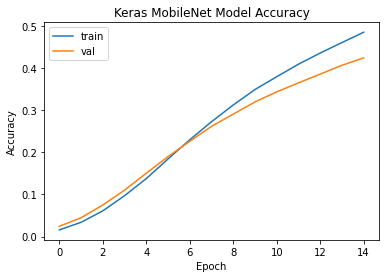

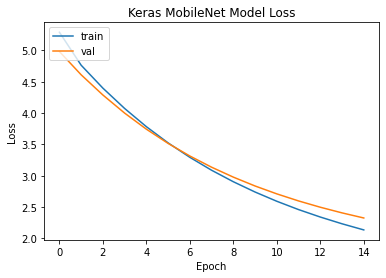

In [ ]:
# plot the accuracies and losses
plt.plot(history_keras_mobilenet.history['accuracy'])
plt.plot(history_keras_mobilenet.history['val_accuracy'])
plt.title('Keras MobileNet Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_keras_mobilenet.history['loss'])
plt.plot(history_keras_mobilenet.history['val_loss'])
plt.title('Keras MobileNet Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
     

In [ ]:
# Summary of Keras pretrained MobileNet model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 120)               123000    
                                                                 
Total params: 3,351,864
Trainable params: 123,000
Non-trainable params: 3,228,864
_________________________________________________________________


The section below creates a simplified version of our MobileNet. We attempted to simplify for the dataset.

In [14]:
def create_MobileNet_model(input_shape, no_classes):
    
    print('layer 1 input', input_shape)

    #first layer (Conv/s2)
    input = Input(shape= input_shape)
    x = Conv2D(32, kernel_size=(3, 3), strides=(2, 2) ,padding='same', use_bias=False)(input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    print('layer 2 input', x.shape)
    #second layer (Conv dw/s1) + (Conv /s1)
    x = DepthWiseConv((3,3), (1,1), x)
    x = PointWiseConv(64,(1, 1), (1, 1) ,x)

    print('layer 3 input', x.shape)
    #third layer (Conv dw/s2) + (Conv /s1)
    x = DepthWiseConv((3,3), (2,2), x)
    x = PointWiseConv(128,(1, 1), (1, 1) ,x)
    
    
    print('layer 4 input', x.shape)
    #4th layer (Conv dw/s1) + (Conv /s1)
    x = DepthWiseConv((3,3), (1,1), x)
    x = PointWiseConv(128,(1, 1), (1, 1) ,x)

    print('layer 5 input', x.shape)
    #5th layer (Conv dw/s2) + (Conv /s1)
    x = DepthWiseConv((3,3), (2,2), x)
    x = PointWiseConv(256,(1, 1), (1, 1) ,x)

    print('layer 6 input', x.shape)
    #6th layer (Conv dw/s1) + (Conv /s1)
    x = DepthWiseConv((3,3), (1,1), x)
    x = PointWiseConv(256,(1, 1), (1, 1) ,x)

    print('layer 7 input', x.shape)
    #7th layer (Conv dw/s2) + (Conv /s1)
    x = DepthWiseConv((3,3), (2,2), x)
    x = PointWiseConv(512,(1, 1), (1, 1) ,x)

    print('layer 8 stack input', x.shape)
    #8thlayer: 5 * (Conv dw/s1) + (Conv dw /s1)
    for _ in range(5):
      x = DepthWiseConv((3,3), (1,1), x)
      x = PointWiseConv(512,(1, 1), (1, 1) ,x)

    print('layer 9 input', x.shape)
    #9th layer (Conv dw/s2) + (Conv /s1)
    x = DepthWiseConv((3,3), (2,2), x)
    x = PointWiseConv(1024,(1, 1), (1, 1) ,x)

    print('layer 10 input', x.shape)
    #10th layer (Conv dw/s2) + (Conv /s1)
    x = DepthWiseConv((3,3), (1,1), x)
    x = PointWiseConv(1024,(1, 1), (1, 1) ,x)

    print('Global Avg Pooling input', x.shape)
    #11th layer: Avg Pooling (7*7)
    x = GlobalAveragePooling2D()(x)

    print('Flatten input', x.shape)
    #print('Flatten layer input', x.shape)
    #Flatten layer / s1? 
    # x = Flatten()(x)

    print('Dense 12 input', x.shape)
    #12th layer : Affine layer
    out = Dense(no_classes,activation='softmax')(x)

    print('out', out.shape)

    model = Model(input, out, name='mobilenet')

    return model    

In [15]:
def DepthWiseConv(kernal_size, stride, x):
    result = DepthwiseConv2D(kernal_size, strides=stride , padding='same')(x)
    result = BatchNormalization()(result)
    result = Activation('relu')(result)
    return result
  
def PointWiseConv(filters,kernal_size, stride, x):
    result = Conv2D(filters, kernel_size=kernal_size, strides=stride)(x)
    result = BatchNormalization()(result)
    result = Activation('relu')(result)
    return result


In [16]:
MobileNet = create_MobileNet_model((128,128,3),120)
MobileNet.summary()


layer 1 input (128, 128, 3)
layer 2 input (None, 64, 64, 32)
layer 3 input (None, 64, 64, 64)
layer 4 input (None, 32, 32, 128)
layer 5 input (None, 32, 32, 128)
layer 6 input (None, 16, 16, 256)
layer 7 input (None, 16, 16, 256)
layer 8 stack input (None, 8, 8, 512)
layer 9 input (None, 8, 8, 512)
layer 10 input (None, 4, 4, 1024)
Global Avg Pooling input (None, 4, 4, 1024)
Flatten input (None, 1024)
Dense 12 input (None, 1024)
out (None, 120)
Model: "mobilenet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        864       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
    

In [17]:
MobileNet.compile(optimizer=tf.keras.optimizers.Adamax(0.0001),loss='categorical_crossentropy', metrics=['accuracy'])

train_batches = prepare(training_data, batch_size=32)
test_batches = prepare(test_data, batch_size=32)

start_time = time.time()

history_our_MobileNet = MobileNet.fit(train_batches, epochs=15, validation_data=test_batches, shuffle=True)

end_time = time.time()

execution_time_our_MobileNet = (end_time - start_time)



Epoch 1/15
375/375 [==============================] - 65s 134ms/step - loss: 4.8387 - accuracy: 0.0080 - val_loss: 4.8722 - val_accuracy: 0.0099
Epoch 2/15
375/375 [==============================] - 52s 134ms/step - loss: 4.7744 - accuracy: 0.0133 - val_loss: 4.8888 - val_accuracy: 0.0157
Epoch 3/15
375/375 [==============================] - 51s 131ms/step - loss: 4.7546 - accuracy: 0.0160 - val_loss: 4.7760 - val_accuracy: 0.0138
Epoch 4/15
375/375 [==============================] - 53s 136ms/step - loss: 4.7399 - accuracy: 0.0172 - val_loss: 4.7729 - val_accuracy: 0.0182
Epoch 5/15
375/375 [==============================] - 52s 133ms/step - loss: 4.7242 - accuracy: 0.0197 - val_loss: 4.7686 - val_accuracy: 0.0178
Epoch 6/15
375/375 [==============================] - 52s 133ms/step - loss: 4.7112 - accuracy: 0.0209 - val_loss: 4.7695 - val_accuracy: 0.0184
Epoch 7/15
375/375 [==============================] - 52s 134ms/step - loss: 4.6945 - accuracy: 0.0233 - val_loss: 4.7649 - val_ac

In [18]:
print("Our MobileNet execution time: ", execution_time_our_MobileNet)

Our MobileNet execution time:  914.4459140300751


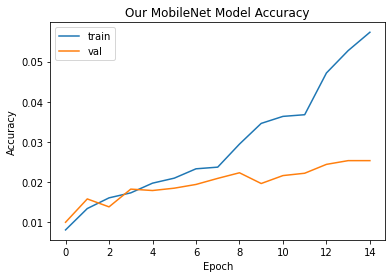

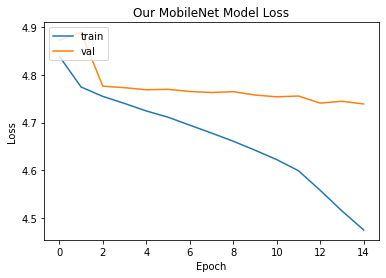

In [19]:
plt.plot(history_our_MobileNet.history['accuracy'])
plt.plot(history_our_MobileNet.history['val_accuracy'])
plt.title('Our MobileNet Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_our_MobileNet.history['loss'])
plt.plot(history_our_MobileNet.history['val_loss'])
plt.title('Our MobileNet Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
     

### CNN Model

In [20]:
def create_CNN_model(input_shape, no_classes):
    
    print('layer 1 input', input_shape)

    #first layer (Conv/s2)
    input = Input(shape= input_shape)
    x = Conv2D(32, kernel_size=(3, 3), strides=(2, 2) ,padding='same', use_bias=False)(input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    print('layer 2 input', x.shape)
    #second layer (Conv dw/s1) + (Conv /s1)
    x = Conv2D(64, kernel_size=(3,3), strides=(1,1) ,padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    #x = standard_Conv(64,(3,3),(1,1),x)(x)

    print('layer 3 input', x.shape)
    #third layer (Conv dw/s2) + (Conv /s1)
    x = Conv2D(128, kernel_size=(3,3), strides=(2,2) ,padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    #x = standard_Conv(128,(3,3), (2,2),x)(x)  
    
    print('layer 4 input', x.shape)
    #4th layer (Conv dw/s1) + (Conv /s1)
    x = Conv2D(128, kernel_size=(3,3), strides=(1,1) ,padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    #x = standard_Conv(128,(3,3), (1,1),x)(x)

    print('layer 5 input', x.shape)
    #5th layer (Conv dw/s2) + (Conv /s1)
    x = Conv2D(256, kernel_size=(3,3), strides=(2,2) ,padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    #x = standard_Conv(256,(3,3), (2,2),x)(x)

    print('layer 6 input', x.shape)
    #6th layer (Conv dw/s1) + (Conv /s1)
    x = Conv2D(256, kernel_size=(3,3), strides=(1,1) ,padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    #x = standard_Conv(256,(3,3), (1,1),x)(x)

    print('layer 7 input', x.shape)
    #7th layer (Conv dw/s2) + (Conv /s1)
    x = Conv2D(512, kernel_size=(3,3), strides=(2,2) ,padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    #x = standard_Conv(512,(3,3), (2,2),x)(x)

    print('layer 8 stack input', x.shape)
    #8thlayer: 5 * (Conv dw/s1) + (Conv dw /s1)
    for _ in range(5):
      x = Conv2D(512, kernel_size=(3,3), strides=(1,1) ,padding='same', use_bias=False)(x)
      x = BatchNormalization()(x)
      x = Activation('relu')(x)
      #x = standard_Conv(512,(3,3), (1,1),x)(x)
      
    print('layer 9 input', x.shape)
    #9th layer (Conv dw/s2) + (Conv /s1)
    x = Conv2D(1024, kernel_size=(3,3), strides=(2,2) ,padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    #x = standard_Conv(1024,(3,3), (2,2),x)(x)

    print('layer 10 input', x.shape)
    #10th layer (Conv dw/s2) + (Conv /s1)
    x = Conv2D(1024, kernel_size=(3,3), strides=(1,1) ,padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    #x = standard_Conv(1024,(3,3), (1,1),x)(x)

    print('Avg Pooling input', x.shape)
    #11th layer: Avg Pooling (7*7)
    x = GlobalAveragePooling2D()(x)

    print('Flatten input', x.shape)
    #print('Flatten layer input', x.shape)
    #Flatten layer / s1? 

    print('Dense 12 input', x.shape)
    #12th layer : Affine layer
    out = Dense(no_classes,activation='softmax')(x)

    print('out', out.shape)

    model = Model(input, out, name='CNN')

    return model    

In [21]:
CNN_Model = create_CNN_model((128,128,3),120)
CNN_Model.summary()

layer 1 input (128, 128, 3)
layer 2 input (None, 64, 64, 32)
layer 3 input (None, 64, 64, 64)
layer 4 input (None, 32, 32, 128)
layer 5 input (None, 32, 32, 128)
layer 6 input (None, 16, 16, 256)
layer 7 input (None, 16, 16, 256)
layer 8 stack input (None, 8, 8, 512)
layer 9 input (None, 8, 8, 512)
layer 10 input (None, 4, 4, 1024)
Avg Pooling input (None, 4, 4, 1024)
Flatten input (None, 1024)
Dense 12 input (None, 1024)
out (None, 120)
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 32)        864       
                                                                 
 batch_normalization_27 (Bat  (None, 64, 64, 32)       128       
 chNormalization)                                                
                 

In [22]:
CNN_Model.compile(optimizer=tf.keras.optimizers.Adamax(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

train_batches = prepare(training_data, batch_size=32)
test_batches = prepare(test_data, batch_size=32)

start_time = time.time()

cnn_history = CNN_Model.fit(train_batches, epochs=15, validation_data=test_batches, verbose=1)

end_time = time.time()

execution_time_cnn = (end_time - start_time)

print('CNN execution time: ', execution_time_cnn)

Epoch 1/15
375/375 [==============================] - 64s 158ms/step - loss: 4.6610 - accuracy: 0.0243 - val_loss: 5.8512 - val_accuracy: 0.0142
Epoch 2/15
375/375 [==============================] - 56s 144ms/step - loss: 4.0077 - accuracy: 0.1390 - val_loss: 4.6319 - val_accuracy: 0.0415
Epoch 3/15
375/375 [==============================] - 55s 141ms/step - loss: 3.1193 - accuracy: 0.4857 - val_loss: 4.3702 - val_accuracy: 0.0568
Epoch 4/15
375/375 [==============================] - 55s 142ms/step - loss: 1.8115 - accuracy: 0.8617 - val_loss: 4.5734 - val_accuracy: 0.0501
Epoch 5/15
375/375 [==============================] - 56s 141ms/step - loss: 0.6255 - accuracy: 0.9827 - val_loss: 4.6709 - val_accuracy: 0.0506
Epoch 6/15
375/375 [==============================] - 55s 141ms/step - loss: 0.1893 - accuracy: 0.9967 - val_loss: 4.7711 - val_accuracy: 0.0459
Epoch 7/15
375/375 [==============================] - 56s 143ms/step - loss: 0.0926 - accuracy: 0.9973 - val_loss: 4.7736 - val_ac

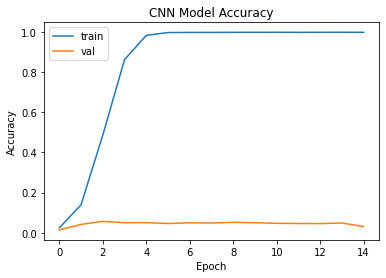

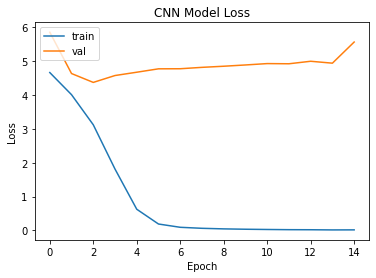

In [23]:
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()